# **Shinkansen Travel Experience**
-----------------------------------------

## **Context**
----------------------------
This is the problem of a Shinkansen (Bullet-Trains) of Japan. They aim to determine the relative importance of each parameter with regards to their contribution to the passenger travel experience. Provided is a random sample of individuals who travelled using their train. The on-time performance of the trains along with the passenger’s information is published in the CSV file named ‘Traveldata_train’.  These passengers were later asked to provide their feedback on various parameters related to the travel along with their overall experience. These collected details are made available in the survey report CSV labelled ‘Surveydata_train’.

In the survey, a passenger was explicitly asked whether they were delighted with their overall travel experience and that is captured in the data of the survey report under the variable labelled ‘Overall_Experience’. 

The objective of this exercise is to understand which parameters play an important role in swaying passenger feedback towards a positive scale. You are provided test data containing Travel data and Survey data of passengers. Both the test data and the train data are collected at the same time and belong to the same company.

## **Goal**
---------------------------------------
The goal of the problem is to predict whether a passenger was delighted considering his/her overall travel experience of traveling in Shinkansen (Bullet Train). For each passenger id in the test set, you must predict the “Overall_Experience” level.

## **Dataset**
--------------------------
The problem consists of 2 separate datasets: Travel data & Survey data. The Travel data has information related to passengers and the performance of the Train in which they traveled. The survey data is the aggregated data of surveys collected post-service experience. You are expected to treat both the datasets as raw data and perform any necessary cleaning/validation steps as required.

------------------------------
## Metric to measure-----------------------------

Your score is the percentage of all correct predictions made by you. This is simply known as accuracy. The best accuracy is 1 whereas the worst is 0. It will be calculated as the total number of two correct predictions (True positive + True negative) divided by the total number of observations in the datase

------------------------------
## Working with Data------------------------------

Data has been split into two groups and provided in the module:

·         train dataset

·         test dataset 

The training set is used to build your machine learning model. For the training set, we provide the Overall_Experience level for each parti
able,Good,Excellent"eptable,Good,Excellent"---
rticipant.t.

----------------------------------
## Target Variable
----------------------------------

Overall_Experience (1 represents ‘satisfied’, and 0 represents ‘not satisfied’)

The test set should be used to see how well your model performs on unseen data. For the test set, it is your job to predict the “Overall Experience” level for each participant.


---------------------------------
## Data Dicitionary
---------------------------------

### Travel Data:

* ID : The unique ID of the passenger -> Continuous value like 98800001, 98800002, etc.

* Gender: The gender of the passenger -> "Male Female"

* Customer_Type: Loyalty type of the passenger -> "Loyal Customer Disloyal Customer"

* Age: The age of the passenger -> Continuous values like 48, 52, 9, etc.

* Type_Travel: Purpose of travel for the passenger -> "Personal Travel Business Travel"

* Travel_Class: The train class that the passenger traveled in -> "Business Eco"

* Travel_Distance: The distance traveled by the passenger -> Continuous values like 272, 780, 853, etc.

* Departure_Delay_in_Mins: The delay (in minutes) in train departure -> Continuous values like 9, 15, 13, etc.

* Arrival_Delay_in_Mins: The delay (in minutes) in train arrival -> Continuous values like 0, 15, 18, etc.


### Survey Data:

* Platform_Location:How convenient the location of the platform is for the passenger->"Very Inconvenient,Inconvenient,Needs Improvement, Manageable,Convenient, Very Convenient"

* Seat_Class: "The type of the seat class in the train; Green Car seats are usually more spacious and comfortable than ordinary seats. On the Shinkansen train, there are only four seats per row in the Green Car, versus five in the ordinary car."-> "Ordinary, Green Car"

* Overall_Experience: The overall experience of the passenger -> "1 - Satisfied 0 - Not Satisfied"

* Seat_Comfort: The comfort level of the seat for the passenger-> "Extremely Poor,Poor,Needs Improvement,Acceptable,Good,Excellent"

* Arrival_Time_Convenient: How convenient the arrival time of the train is for the passenger-> "Extremely Poor,Poor,Needs Improvement,Acceptable,Good,Excellent"

* Catering: How convenient the catering service is for the passenger-> "Extremely Poor,Poor,Needs Improvement,Acceptable,Good,Excellent"

* Onboard_Wifi_Service: The quality of the onboard Wi-Fi service for the passenger->"Extremely Poor,Poor,Needs Improvement,Acceptable,Good,Excellent"

* Onboard_Entertainment: The quality of the onboard entertainment for the passenger-> "Extremely Poor,Poor,Needs Improvement,Acceptable,Good,Excellent"

* Online_Support: The quality of the online support for the passenger -> "Extremely Poor,Poor,Needs Improvement,Acceptable,Good,Excellent"

* Ease_of_Online_Booking: The ease of online booking for the passenger ->"Extremely Poor,Poor,Needs Improvement,Acceptable,Good,Excellent"

* Onboard_Service: The quality of the onboard service for the passenger-> "Extremely Poor,Poor,Needs Improvement,Acceptable,Good,Excellent"

* Legroom: Legroom is the general term used in place of the more accurate “seat pitch”, which is the distance between a point on one seat and the same point on the seat in front of it. This variable describes the convenience of the legroom provided for the passenger -> "Extremely Poor,Poor,Needs Improvement,Acceptable,Good,Excellent"

* Baggage_Handling: The convenience of baggage handling for the passenger -> "Extremely Poor,Poor,Needs Improvement,Acceptable,Good,Excellent"

* CheckIn_Service: The convenience of the check-in service for the passenger-> "Extremely Poor,Poor,Needs Improvement,Acceptable,Good,Excellent"

* Cleanliness: The passenger's view of the cleanliness of the service-> "Extremely Poor,Poor,Needs Improvement,Acceptable,Good,Excellent"

* Online_Boarding: The convenience of the online boarding process for the passenger "Extremely Poor,Poor,Needs Improvement,Acceptable,Good,Excellent"

* The categories of the ordinal variables in the above dataset are in the same order they are specified in the Column Value Examples. For example: For the Platform_Location column, the order would be Very Inconvenient < Inconvenient < Needs Improvement < Manageable < Convenient < Very Convenient

In [1]:
# Loading the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn import preprocessing

# Algorithms to use
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import xgboost as xgb


# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score, accuracy_score
from sklearn import tree
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.metrics import log_loss

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
survey_data_original = pd.read_csv("Surveydata_train.csv")
travel_data_original = pd.read_csv("Traveldata_train.csv")
survey_data_original_test = pd.read_csv("Surveydata_test.csv")
travel_data_original_test = pd.read_csv("Traveldata_test.csv")
# Copying data to another variable to avoid any changes to original data
survey_train_df = survey_data_original.copy()
travel_train_df = travel_data_original.copy()
survey_test_df = survey_data_original_test.copy()
travel_test_df = travel_data_original_test.copy()

In [3]:
# Merging the datasets
df_train = pd.merge(travel_train_df, survey_train_df, on = 'ID', how = 'inner')
df_test = pd.merge(travel_test_df, survey_test_df, on = 'ID', how = 'inner')

In [4]:
df_train = df_train.drop(["ID"], axis=1)
Submission=pd.DataFrame(df_test['ID'])
df_test = df_test.drop(["ID"], axis=1)

In [5]:
df_train.head()

,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Overall_Experience,Seat_comfort,...,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,need improvement,...,good,need improvement,acceptable,need improvement,need improvement,acceptable,need improvement,good,need improvement,poor
1,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,poor,...,good,poor,good,good,excellent,need improvement,poor,need improvement,good,good
2,Female,Loyal Customer,43.0,Business travel,Business,1061,77.0,119.0,1,need improvement,...,need improvement,good,excellent,excellent,excellent,excellent,excellent,good,excellent,excellent
3,Female,Loyal Customer,44.0,Business travel,Business,780,13.0,18.0,0,acceptable,...,acceptable,need improvement,acceptable,acceptable,acceptable,acceptable,acceptable,good,acceptable,acceptable
4,Female,Loyal Customer,50.0,Business travel,Business,1981,0.0,0.0,1,acceptable,...,need improvement,good,excellent,good,good,good,good,good,good,good


In [6]:
df_test.head()

,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Seat_comfort,Seat_Class,...,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,Female,NaN,36.0,Business travel,Business,532,0.0,0.0,acceptable,Green Car,...,need improvement,excellent,good,excellent,excellent,excellent,excellent,good,excellent,poor
1,Female,disloyal Customer,21.0,Business travel,Business,1425,9.0,28.0,extremely poor,Ordinary,...,acceptable,poor,acceptable,acceptable,excellent,acceptable,good,acceptable,excellent,acceptable
2,Male,Loyal Customer,60.0,Business travel,Business,2832,0.0,0.0,excellent,Ordinary,...,excellent,excellent,excellent,need improvement,need improvement,need improvement,need improvement,good,need improvement,excellent
3,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0,acceptable,Green Car,...,poor,acceptable,excellent,poor,acceptable,need improvement,excellent,excellent,excellent,poor
4,Male,disloyal Customer,18.0,Business travel,Business,1610,17.0,0.0,excellent,Ordinary,...,excellent,excellent,excellent,excellent,NaN,acceptable,excellent,excellent,excellent,excellent


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   94302 non-null  object 
 1   CustomerType             85428 non-null  object 
 2   Age                      94346 non-null  float64
 3   TypeTravel               85153 non-null  object 
 4   Travel_Class             94379 non-null  object 
 5   Travel_Distance          94379 non-null  int64  
 6   DepartureDelay_in_Mins   94322 non-null  float64
 7   ArrivalDelay_in_Mins     94022 non-null  float64
 8   Overall_Experience       94379 non-null  int64  
 9   Seat_comfort             94318 non-null  object 
 10  Seat_Class               94379 non-null  object 
 11  Arrival_time_convenient  85449 non-null  object 
 12  Catering                 85638 non-null  object 
 13  Platform_location        94349 non-null  object 
 14  Onboardwifi_service   

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   35572 non-null  object 
 1   CustomerType             32219 non-null  object 
 2   Age                      35591 non-null  float64
 3   TypeTravel               32154 non-null  object 
 4   Travel_Class             35602 non-null  object 
 5   Travel_Distance          35602 non-null  int64  
 6   DepartureDelay_in_Mins   35573 non-null  float64
 7   ArrivalDelay_in_Mins     35479 non-null  float64
 8   Seat_comfort             35580 non-null  object 
 9   Seat_Class               35602 non-null  object 
 10  Arrival_time_convenient  32277 non-null  object 
 11  Catering                 32245 non-null  object 
 12  Platform_location        35590 non-null  object 
 13  Onboardwifi_service      35590 non-null  object 
 14  Onboard_entertainment 

In [9]:
df_train.nunique()

Gender                        2
CustomerType                  2
Age                          75
TypeTravel                    2
Travel_Class                  2
Travel_Distance            5210
DepartureDelay_in_Mins      437
ArrivalDelay_in_Mins        434
Overall_Experience            2
Seat_comfort                  6
Seat_Class                    2
Arrival_time_convenient       6
Catering                      6
Platform_location             6
Onboardwifi_service           6
Onboard_entertainment         6
Online_support                6
Onlinebooking_Ease            6
Onboard_service               6
Leg_room                      6
Baggage_handling              5
Checkin_service               6
Cleanliness                   6
Online_boarding               6
dtype: int64

In [10]:
df_test.nunique()

Gender                        2
CustomerType                  2
Age                          75
TypeTravel                    2
Travel_Class                  2
Travel_Distance            4644
DepartureDelay_in_Mins      350
ArrivalDelay_in_Mins        355
Seat_comfort                  6
Seat_Class                    2
Arrival_time_convenient       6
Catering                      6
Platform_location             5
Onboardwifi_service           6
Onboard_entertainment         6
Online_support                5
Onlinebooking_Ease            6
Onboard_service               5
Leg_room                      6
Baggage_handling              5
Checkin_service               5
Cleanliness                   5
Online_boarding               6
dtype: int64

In [11]:
print(df_train.duplicated().sum())
print(df_test.duplicated().sum())
df_train.drop_duplicates()
df_test.drop_duplicates()

27
2


,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Seat_comfort,Seat_Class,...,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,Female,NaN,36.0,Business travel,Business,532,0.0,0.0,acceptable,Green Car,...,need improvement,excellent,good,excellent,excellent,excellent,excellent,good,excellent,poor
1,Female,disloyal Customer,21.0,Business travel,Business,1425,9.0,28.0,extremely poor,Ordinary,...,acceptable,poor,acceptable,acceptable,excellent,acceptable,good,acceptable,excellent,acceptable
2,Male,Loyal Customer,60.0,Business travel,Business,2832,0.0,0.0,excellent,Ordinary,...,excellent,excellent,excellent,need improvement,need improvement,need improvement,need improvement,good,need improvement,excellent
3,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0,acceptable,Green Car,...,poor,acceptable,excellent,poor,acceptable,need improvement,excellent,excellent,excellent,poor
4,Male,disloyal Customer,18.0,Business travel,Business,1610,17.0,0.0,excellent,Ordinary,...,excellent,excellent,excellent,excellent,NaN,acceptable,excellent,excellent,excellent,excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35597,Male,Loyal Customer,8.0,Personal Travel,Eco,1334,0.0,0.0,need improvement,Green Car,...,acceptable,need improvement,acceptable,acceptable,good,excellent,good,acceptable,good,acceptable
35598,Female,Loyal Customer,53.0,Business travel,Business,1772,0.0,0.0,need improvement,Ordinary,...,acceptable,excellent,excellent,good,good,good,good,acceptable,good,good
35599,Male,disloyal Customer,22.0,Business travel,Eco,1180,0.0,0.0,good,Green Car,...,need improvement,good,poor,need improvement,poor,acceptable,poor,poor,excellent,need improvement
35600,Female,Loyal Customer,67.0,Personal Travel,Eco,420,23.0,16.0,excellent,Ordinary,...,acceptable,excellent,good,excellent,excellent,excellent,excellent,acceptable,excellent,good


In [23]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,94346.0,39.419647,15.116632,7.0,27.0,40.0,51.0,85.0
Travel_Distance,94379.0,1978.888185,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0
DepartureDelay_in_Mins,94322.0,14.647092,38.138781,0.0,0.0,0.0,12.0,1592.0
ArrivalDelay_in_Mins,94022.0,15.005222,38.439409,0.0,0.0,0.0,13.0,1584.0
Overall_Experience,94379.0,0.546658,0.497821,0.0,0.0,1.0,1.0,1.0


In [25]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,35591.0,39.446995,15.137554,7.0,27.0,40.0,51.0,85.0
Travel_Distance,35602.0,1987.151761,1024.308863,50.0,1360.0,1929.0,2559.0,6868.0
DepartureDelay_in_Mins,35573.0,14.880696,37.895453,0.0,0.0,0.0,13.0,978.0
ArrivalDelay_in_Mins,35479.0,15.308802,38.531293,0.0,0.0,0.0,13.0,970.0


In [27]:
df_train['Overall_Experience'].value_counts(normalize = True)

Overall_Experience
1    0.546658
0    0.453342
Name: proportion, dtype: float64

In [29]:
# Creating numerical columns
num_cols = ['Age', 'Travel_Distance', 'DepartureDelay_in_Mins', 'ArrivalDelay_in_Mins', 'Overall_Experience']

# Creating categorical variables
cat_cols = ['Gender', 'CustomerType', 'TypeTravel', 'Travel_Class', 'Seat_comfort', 'Seat_Class', 'Arrival_time_convenient',
           'Catering', 'Platform_location', 'Onboardwifi_service', 'Onboard_entertainment', 'Online_support', 'Onlinebooking_Ease',
           'Onboard_service', 'Leg_room', 'Baggage_handling', 'Checkin_service', 'Cleanliness', 'Online_boarding']

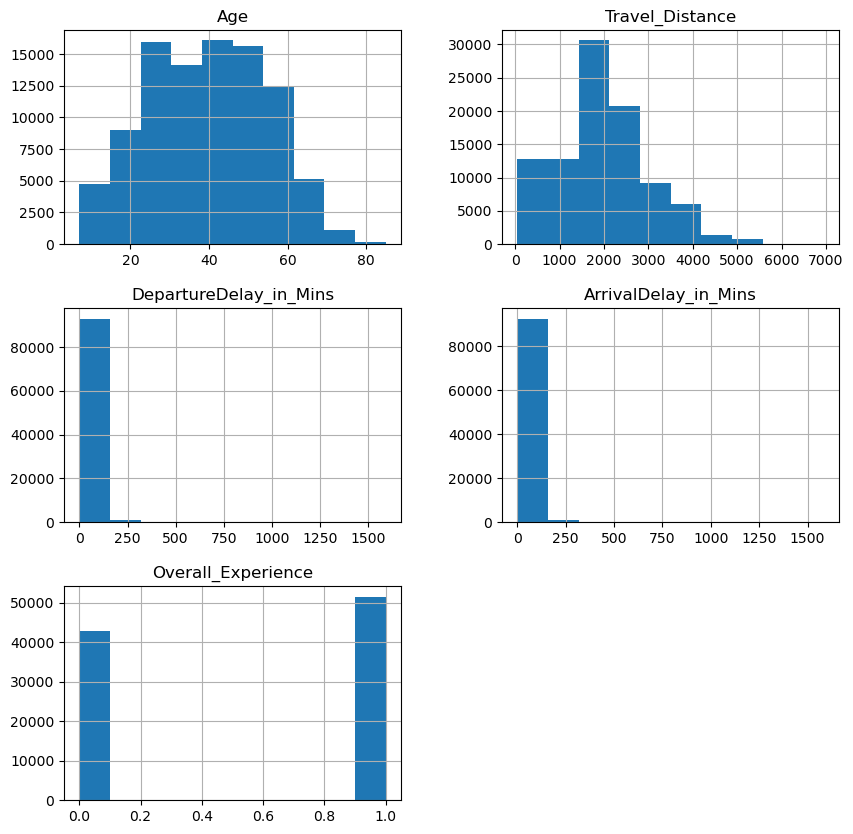

In [31]:
df_train[num_cols].hist(figsize = (10, 10))
plt.show()

In [32]:
# Mean of numerical variables grouped by status
df_train.groupby(['Overall_Experience'])[num_cols].mean()

,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Overall_Experience
Overall_Experience,,,,,
0,37.49018,2025.826088,17.738600,18.392374,0.0
1,41.01968,1939.962650,12.083107,12.196763,1.0


In [34]:
df_train.isnull().sum()

Gender                       77
CustomerType               8951
Age                          33
TypeTravel                 9226
Travel_Class                  0
Travel_Distance               0
DepartureDelay_in_Mins       57
ArrivalDelay_in_Mins        357
Overall_Experience            0
Seat_comfort                 61
Seat_Class                    0
Arrival_time_convenient    8930
Catering                   8741
Platform_location            30
Onboardwifi_service          30
Onboard_entertainment        18
Online_support               91
Onlinebooking_Ease           73
Onboard_service            7601
Leg_room                     90
Baggage_handling            142
Checkin_service              77
Cleanliness                   6
Online_boarding               6
dtype: int64

In [37]:
pd.DataFrame(data={'% of Missing Values':round(df_train.isna().sum()/df_train.isna().count()*100,2)}).sort_values(by='% of Missing Values',ascending=False)

,% of Missing Values
TypeTravel,9.78
CustomerType,9.48
Arrival_time_convenient,9.46
Catering,9.26
Onboard_service,8.05
ArrivalDelay_in_Mins,0.38
Baggage_handling,0.15
Leg_room,0.10
Online_support,0.10
Checkin_service,0.08


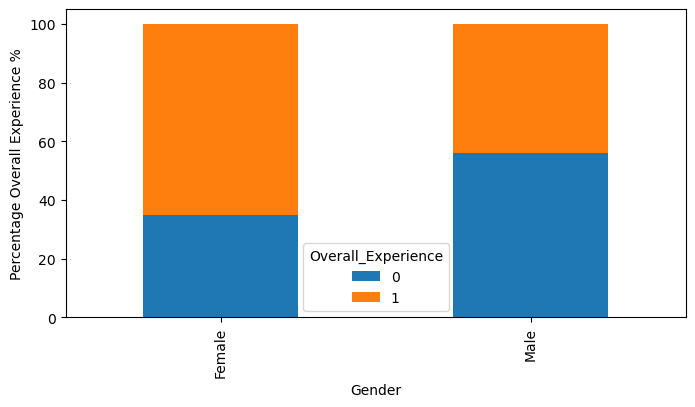

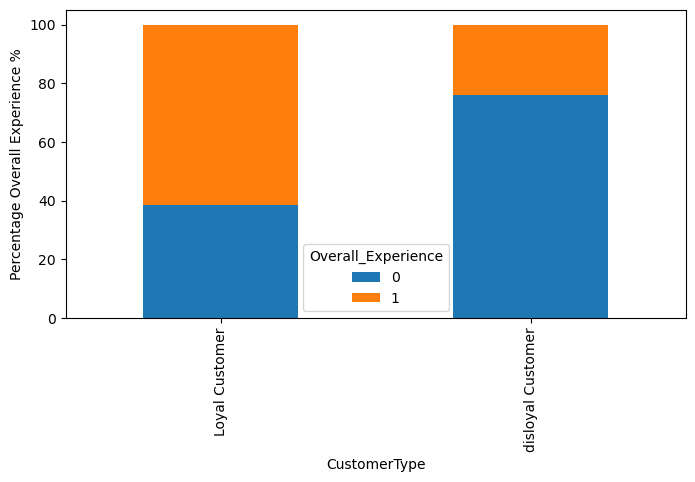

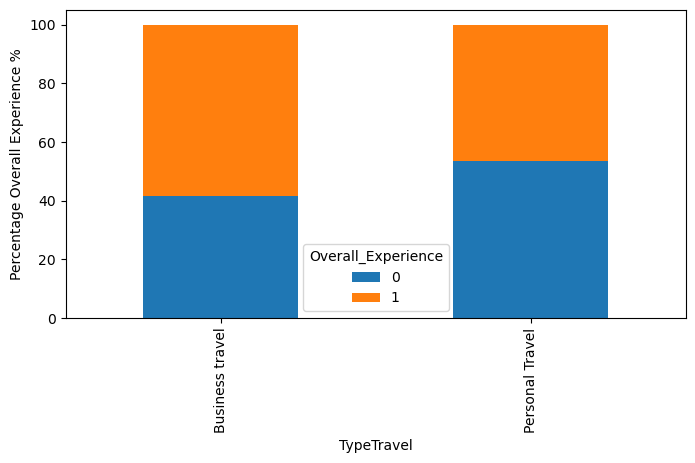

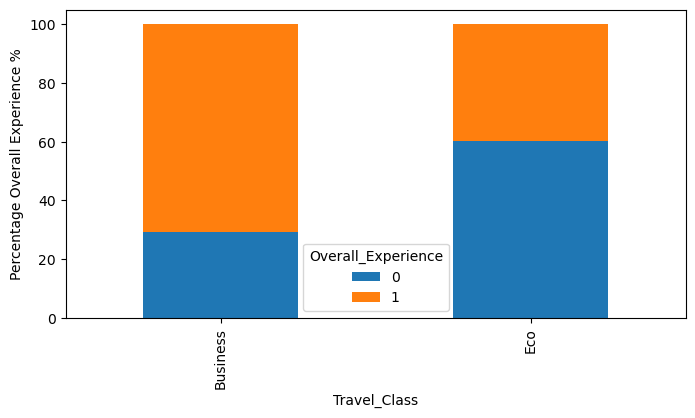

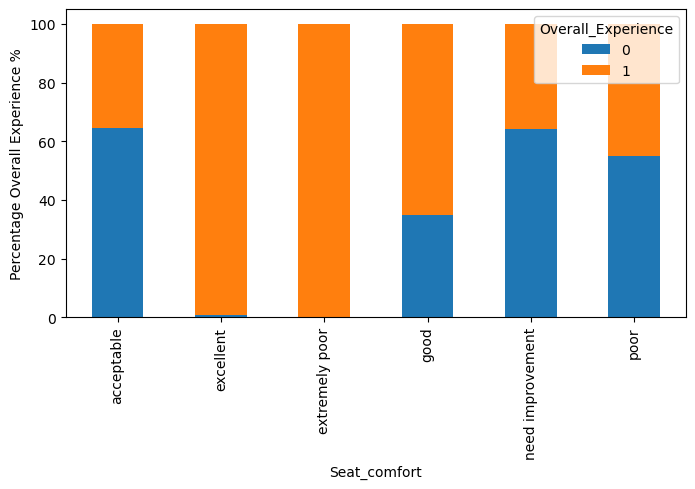

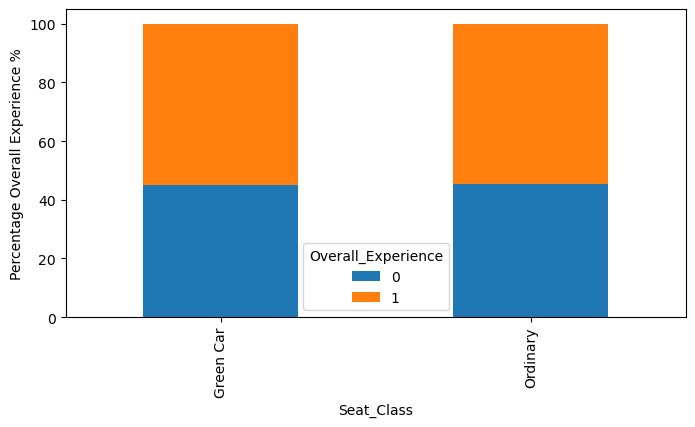

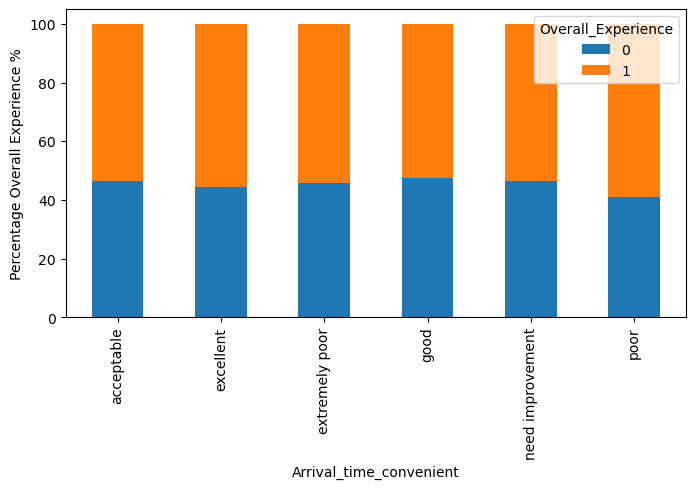

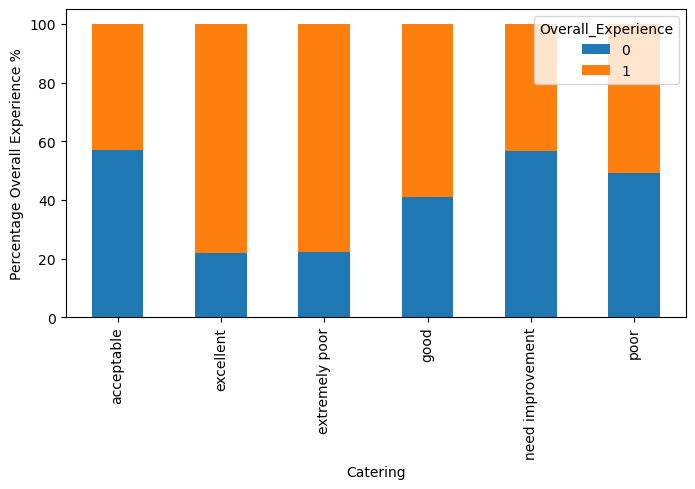

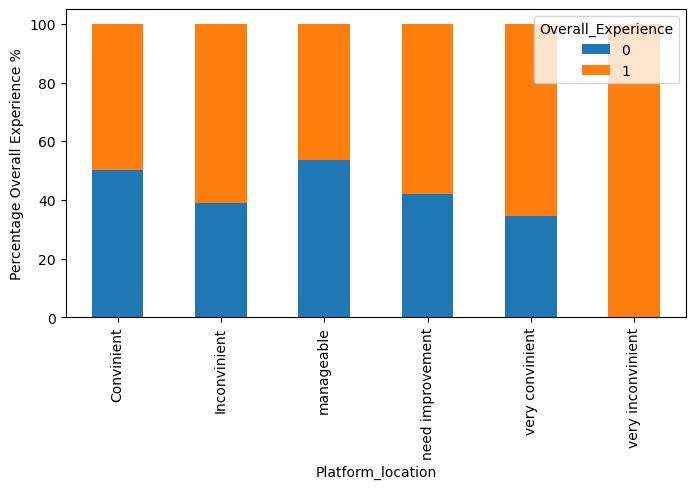

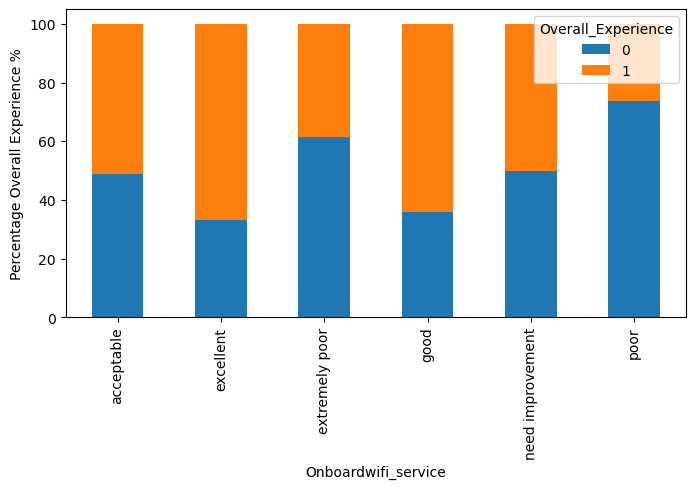

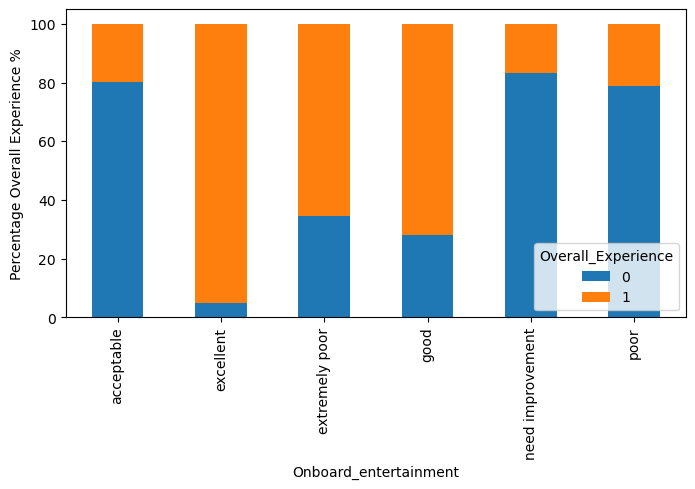

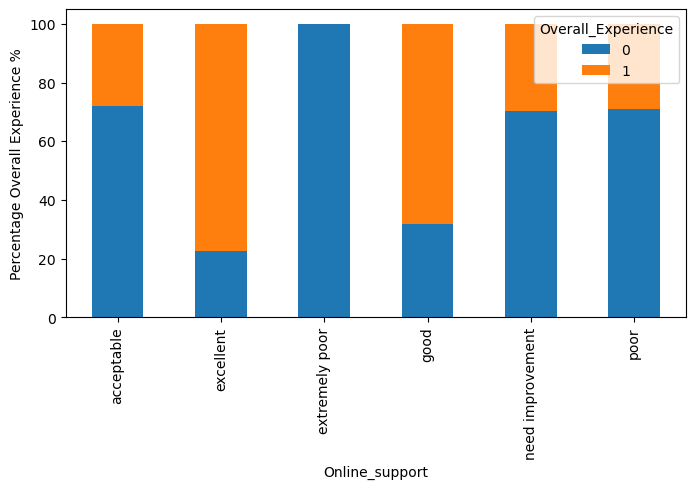

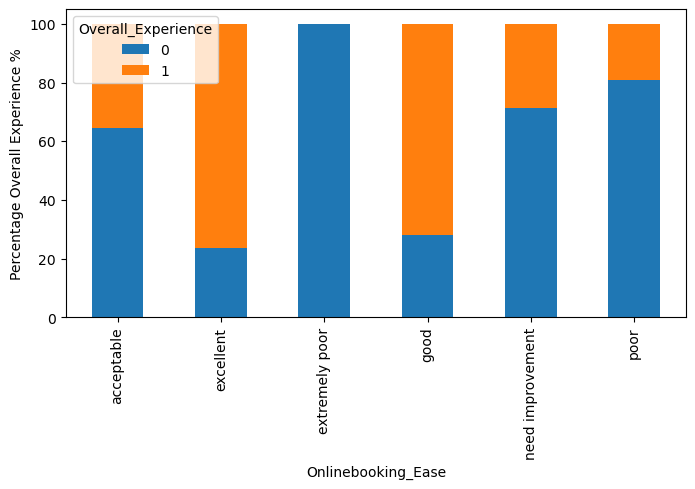

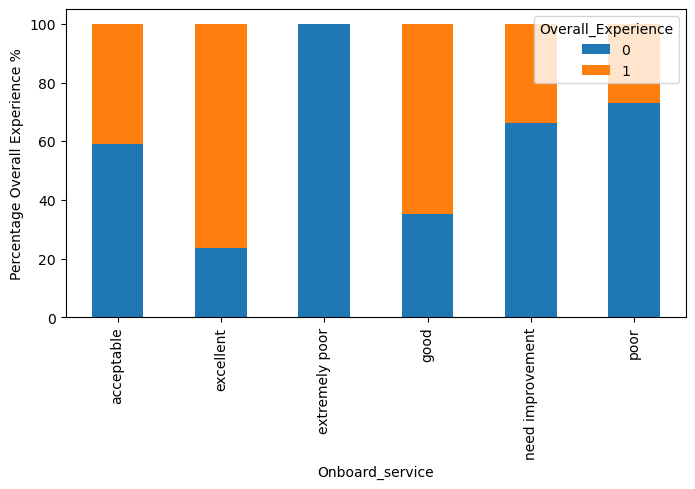

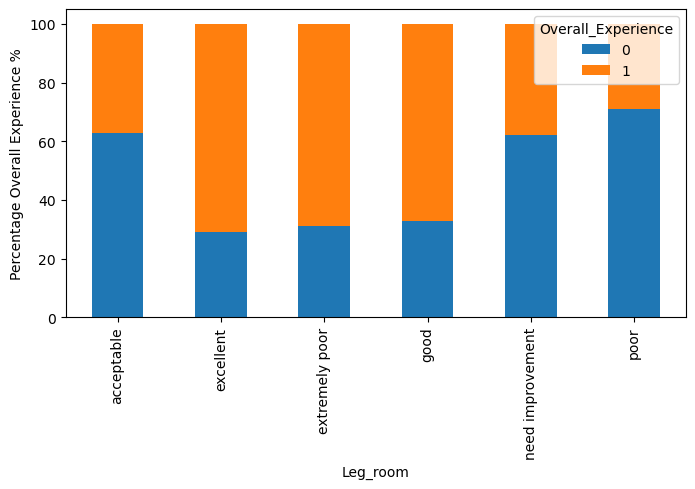

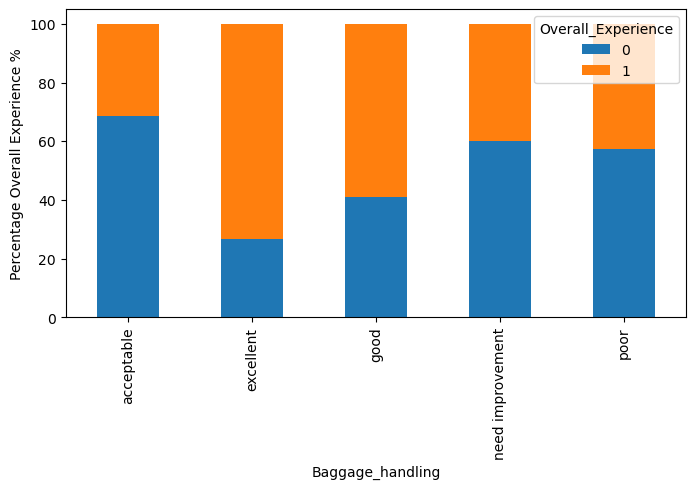

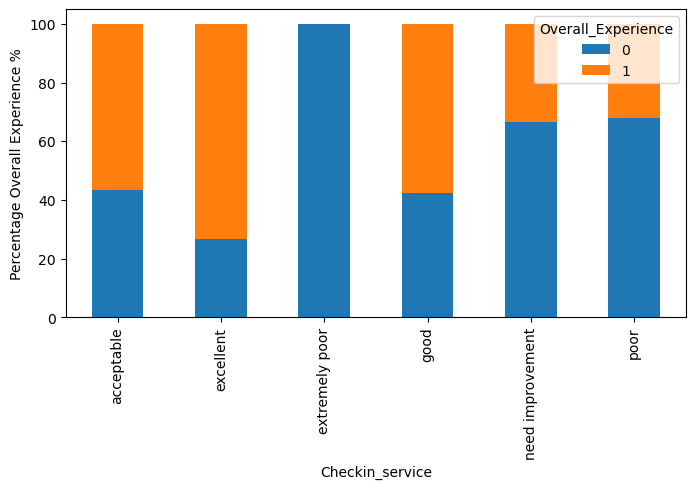

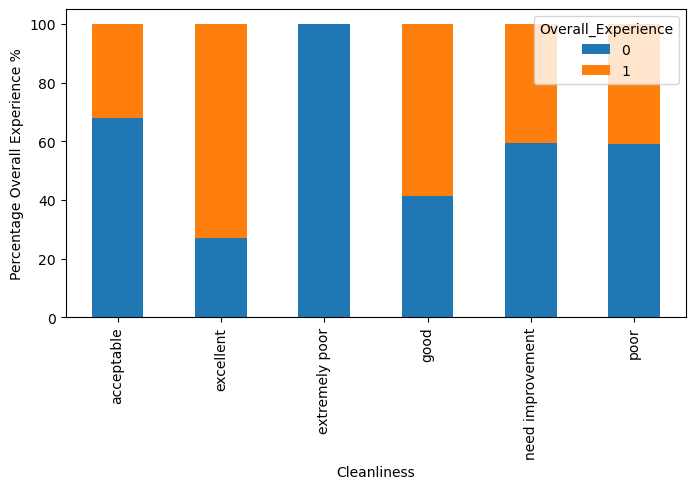

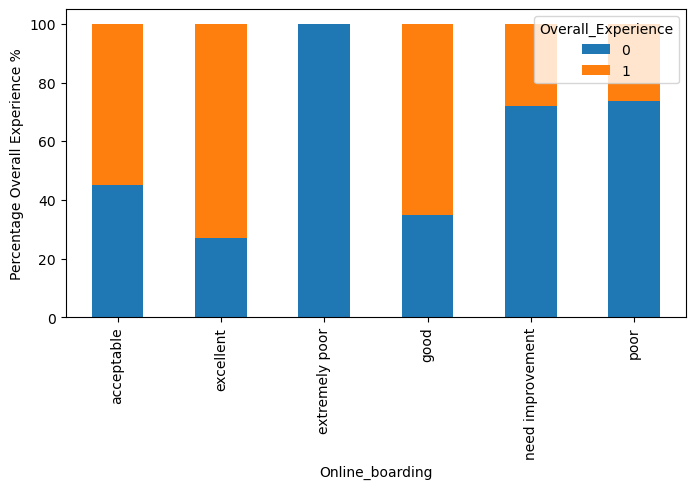

In [38]:
for i in cat_cols:
    if i != 'Overall_Experience':
        (pd.crosstab(df_train[i], df_train['Overall_Experience'], normalize = 'index')*100).plot(kind = 'bar', figsize = (8, 4), stacked = True)
        plt.ylabel('Percentage Overall Experience %')

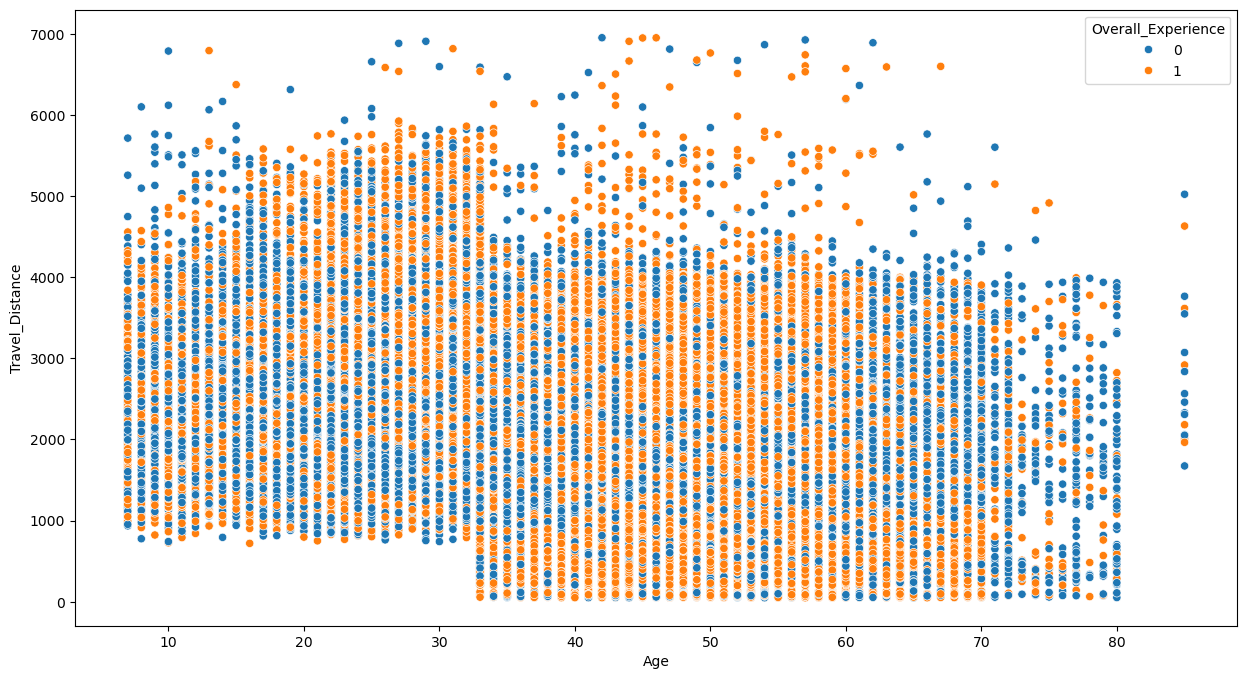

In [40]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df_train, x='Age',y='Travel_Distance',hue='Overall_Experience');

<Axes: >

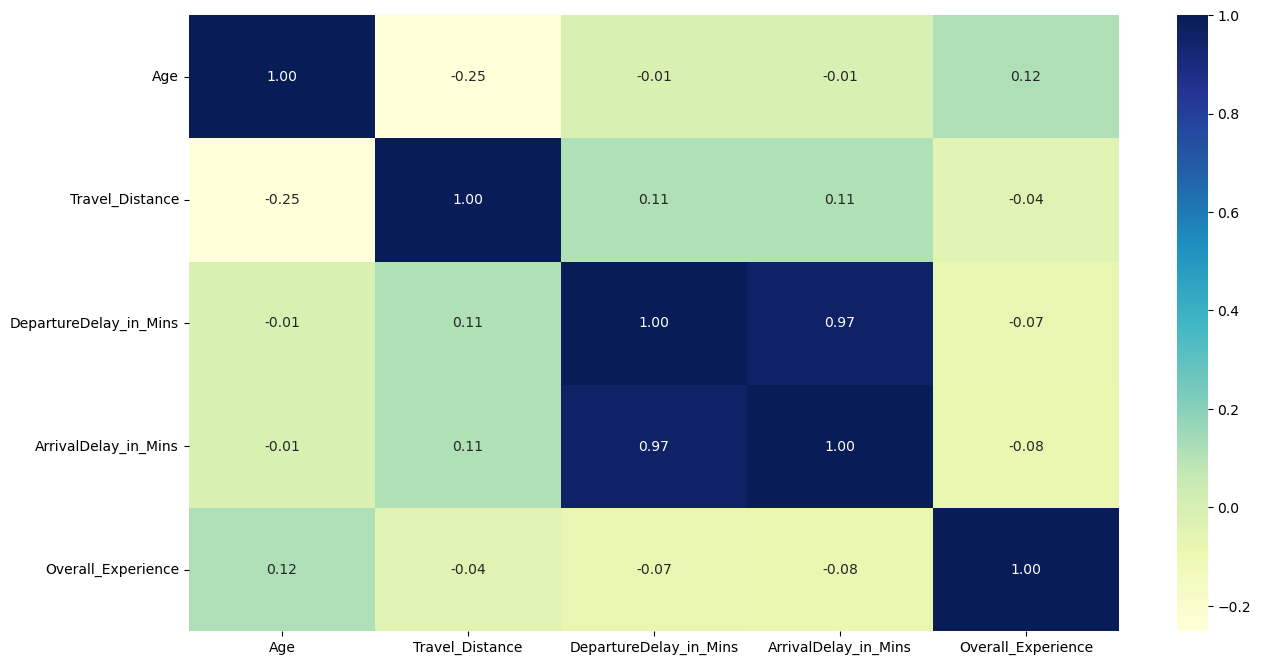

In [41]:
# Plotting the correlation between numerical variables
plt.figure(figsize=(15,8))
sns.heatmap(df_train[num_cols].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

In [42]:
for cols in df_train.columns:
    if df_train[cols].dtype == 'object':
        df_train[cols].fillna(df_train[cols].mode()[0],inplace=True)
    if df_train[cols].dtype == 'float64':
        df_train[cols].fillna(df_train[cols].mean(),inplace=True)
    if df_train[cols].dtype == 'int64':
        df_train[cols].fillna(df_train[cols].mean(),inplace=True)

In [43]:
for cols in df_test.columns:
    if df_test[cols].dtype == 'object':
        df_test[cols].fillna(df_test[cols].mode()[0],inplace=True)
    if df_test[cols].dtype == 'float64':
        df_test[cols].fillna(df_test[cols].mean(),inplace=True)
    if df_test[cols].dtype == 'int64':
        df_test[cols].fillna(df_test[cols].mean(),inplace=True)

In [44]:
df_train = df_train.replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [6, 5, 4, 3, 2, 1])
df_train = df_train.replace(['Male', 'Female'], [1,0])
df_train = df_train.replace(['Loyal Customer', 'disloyal Customer'], [1,0])
df_train = df_train.replace(['Business travel', 'Personal Travel'], [1,0])
df_train = df_train.replace(['Business', 'Eco'], [1,0])
df_train = df_train.replace(['Green Car', 'Ordinary'], [1,0])
df_train = df_train.replace(['very convenient', 'Convenient', 'manageable', 'need improvement', 'Inconvenient', 'very inconvenient'], [6, 5, 4, 3, 2, 1])

In [45]:
# Encoding Categorical Values - test data
df_test = df_test.replace(['excellent', 'good', 'acceptable', 'need Improvement', 'poor', 'extremely poor'], [6, 5, 4, 3, 2, 1])
df_test = df_test.replace(['Male', 'Female'], [1,0])
df_test = df_test.replace(['Loyal Customer', 'disloyal Customer'], [1,0])
df_test = df_test.replace(['Business travel', 'Personal Travel'], [1,0])
df_test = df_test.replace(['Business', 'Eco'], [1,0])
df_test = df_test.replace(['Green Car', 'Ordinary'], [1,0])
df_test = df_test.replace(['very convenient', 'Convenient', 'manageable', 'need improvement', 'Inconvenient', 'very inconvenient'], [6, 5, 4, 3, 2, 1])

In [46]:
df_train.head(3)

,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Overall_Experience,Seat_comfort,...,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,0,1,52.0,1,1,272,0.0,5.0,0,3,...,5,3,4,3,3,4,3,5,3,2
1,1,1,48.0,0,0,2200,9.0,0.0,0,2,...,5,2,5,5,6,3,2,3,5,5
2,0,1,43.0,1,1,1061,77.0,119.0,1,3,...,3,5,6,6,6,6,6,5,6,6


In [47]:
df_test.head(3)

,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Seat_comfort,Seat_Class,...,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,0,1,36.0,1,1,532,0.0,0.0,4,1,...,3,6,5,6,6,6,6,5,6,2
1,0,0,21.0,1,1,1425,9.0,28.0,1,0,...,4,2,4,4,6,4,5,4,6,4
2,1,1,60.0,1,1,2832,0.0,0.0,6,0,...,6,6,6,3,3,3,3,5,3,6


In [48]:
df_train["Platform_location"].unique()

array(['very convinient', 3, 4, 'Inconvinient', 'Convinient',
       'very inconvinient'], dtype=object)

In [49]:
df_test["Platform_location"].unique()

array([4, 'very convinient', 3, 'Inconvinient', 'Convinient'],
      dtype=object)

In [50]:
df_test['Platform_location']=np.where( df_test['Platform_location'] =='very inconvinientt', 1,  df_test['Platform_location'])
df_test['Platform_location']=np.where( df_test['Platform_location'] =='Inconvenient', 2,  df_test['Platform_location'])
df_test['Platform_location']=np.where( df_test['Platform_location'] =='Convinient', 5,  df_test['Platform_location'])
df_test['Platform_location']=np.where( df_test['Platform_location'] =='very convinient', 6, df_test['Platform_location'])
df_train['Platform_location']=np.where( df_train['Platform_location'] =='very inconvinient', 1,  df_train['Platform_location'])
df_train['Platform_location']=np.where( df_train['Platform_location'] =='Inconvenient', 2,  df_train['Platform_location'])
df_train['Platform_location']=np.where( df_train['Platform_location'] =='Convinient', 5,  df_train['Platform_location'])
df_train['Platform_location']=np.where( df_train['Platform_location'] =='very convinient', 6, df_train['Platform_location'])

In [51]:
df_train["Platform_location"].unique()

array([6, 3, 4, 'Inconvinient', 5, 1], dtype=object)

In [52]:
df_test["Platform_location"].unique()

array([4, 6, 3, 'Inconvinient', 5], dtype=object)

In [53]:
df_train['Platform_location']=np.where( df_train['Platform_location'] =='Inconvinient', 2,  df_train['Platform_location'])
df_test['Platform_location']=np.where( df_test['Platform_location'] =='Inconvinient', 2,  df_test['Platform_location'])

In [54]:
df_train["Platform_location"].unique()

array([6, 3, 4, 2, 5, 1], dtype=object)

In [55]:
df_test["Platform_location"].unique()

array([4, 6, 3, 2, 5], dtype=object)

In [58]:
df_train.isnull().sum()

Gender                     0
CustomerType               0
Age                        0
TypeTravel                 0
Travel_Class               0
Travel_Distance            0
DepartureDelay_in_Mins     0
ArrivalDelay_in_Mins       0
Overall_Experience         0
Seat_comfort               0
Seat_Class                 0
Arrival_time_convenient    0
Catering                   0
Platform_location          0
Onboardwifi_service        0
Onboard_entertainment      0
Online_support             0
Onlinebooking_Ease         0
Onboard_service            0
Leg_room                   0
Baggage_handling           0
Checkin_service            0
Cleanliness                0
Online_boarding            0
dtype: int64

In [59]:
df_test.isnull().sum()

Gender                     0
CustomerType               0
Age                        0
TypeTravel                 0
Travel_Class               0
Travel_Distance            0
DepartureDelay_in_Mins     0
ArrivalDelay_in_Mins       0
Seat_comfort               0
Seat_Class                 0
Arrival_time_convenient    0
Catering                   0
Platform_location          0
Onboardwifi_service        0
Onboard_entertainment      0
Online_support             0
Onlinebooking_Ease         0
Onboard_service            0
Leg_room                   0
Baggage_handling           0
Checkin_service            0
Cleanliness                0
Online_boarding            0
dtype: int64

In [60]:
# # Dropping variables that cannot add value to our model from both the train and test
df_train.drop(['Seat_Class'], axis = 1, inplace = True)
df_test.drop(['Seat_Class'], axis = 1, inplace = True)

In [61]:
# Separating the target variable and other variables
y_train = df_train['Overall_Experience']
X_train = df_train.drop(columns = ['Overall_Experience'], axis = 1, inplace = True)

In [62]:
X = X_train
Xtest = df_test

In [63]:
# from sklearn.preprocessing import MinMaxScaler
# import statsmodels.api as sm
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X_train)
# X = pd.DataFrame(train_scaled, index = X_train.index, columns = X_train.columns)

In [64]:
# scaler = MinMaxScaler()
# Xtest = scaler.fit_transform(x_test_dummy)
# Xtest = pd.DataFrame(test_scaled, index = X_test.index, columns = X_test.columns)

In [66]:
X 

In [70]:
Xtest.head(2)

,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Seat_comfort,Arrival_time_convenient,...,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,0,1,36.0,1,1,532,0.0,0.0,4,4,...,3,6,5,6,6,6,6,5,6,2
1,0,0,21.0,1,1,1425,9.0,28.0,1,5,...,4,2,4,4,6,4,5,4,6,4


In [71]:
X.info()

AttributeError: 'NoneType' object has no attribute 'info'

In [ ]:
Xtest.info()

In [ ]:
corr_matrix = X.corr()

In [ ]:
# Checking for the most correlated variables
threshold = 0.95
for col in corr_matrix.columns:
    for row, val in corr_matrix[col].items():
        correlation = corr_matrix[col][row]
        if not col==row and correlation > threshold:
            print(f"{col}   and   {row}   correlation  = {correlation}")

In [ ]:
# # Dropping the correlated columns
X.drop(columns = ['DepartureDelay_in_Mins',''])

In [ ]:
Xtest.drop(columns = ['DepartureDelay_in_Mins'])

In [ ]:
X.shape

In [ ]:
Xtest.shape

In [ ]:
X.info()

In [ ]:
Xtest.info()

In [ ]:
features = list(X.columns)
features_test = list(Xtest.columns)

In [ ]:
# Creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Satisfied', 'Satisfied'], yticklabels=['Not Satisfied', 'Satisfied'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [ ]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_train, test_size = 0.3, random_state = 1)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
y_train.value_counts(normalize=True)

In [ ]:
y_test.value_counts(normalize=True) 

In [ ]:
dtree = DecisionTreeClassifier(random_state = 1)

dtree.fit(X_train, y_train)

In [ ]:
y_train_pred_dtree = dtree.predict(X_train)

metrics_score(y_train, y_train_pred_dtree)

In [ ]:
y_test_pred_dtree = dtree.predict(X_test)

metrics_score(y_test, y_test_pred_dtree)

In [ ]:
accuracy_score(y_test, y_test_pred_dtree)

In [ ]:
# Choose the type of classifier
dtree_tuned = DecisionTreeClassifier(random_state = 1, class_weight = {0: 0.545917, 1: 0.454083})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 9),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring = scorer, cv = 10,n_jobs= -1)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
dtree_tuned.fit(X_train, y_train)

In [ ]:
# Checking performance on the training dataset
y_train_pred_dtree = dtree_tuned.predict(X_train)

metrics_score(y_train, y_train_pred_dtree)

In [ ]:
accuracy_score(y_train, y_train_pred_dtree)

In [ ]:
# Checking performance on the test dataset
y_test_pred_dtree = dtree_tuned.predict(X_test)

metrics_score(y_test, y_test_pred_dtree)

In [ ]:
accuracy_score(y_test, y_test_pred_dtree)

In [ ]:
# Plot the feature importance of the tuned decision tree
importances = dtree.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 15))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)

In [ ]:
 #Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.545917, 1: 0.454083}, random_state = 1)

rf_estimator.fit(X_train, y_train)

In [ ]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

In [ ]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

In [ ]:
accuracy_score(y_test, y_pred_test_rf)

In [ ]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.545917, 1: 0.454083}, random_state = 1)

# Grid of parameters to choose from
params_rf = {
        "n_estimators": [20, 50, 70],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.6, 0.8, 'auto'],
}

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5, n_jobs= -1)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [ ]:
# Fit the best algorithm to the data
rf_estimator_tuned.fit(X_train, y_train)

In [ ]:
y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train_rf_tuned)

In [ ]:
y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test_rf_tuned)

In [ ]:
accuracy_score(y_test, y_pred_test_rf_tuned)

In [ ]:
# Fitting with Adaptive Boosting on top of random forest tree classifier on the training data
adaboost = AdaBoostClassifier(n_estimators=70, random_state=1)
adaboost.fit(X_train, y_train)

In [ ]:
y_pred_train_ada = adaboost.predict(X_train)

metrics_score(y_train, y_pred_train_ada)

In [ ]:
y_pred_train_ada = adaboost.predict(X_test)

metrics_score(y_test, y_pred_train_ada)

In [ ]:
accuracy_score(y_test, y_pred_train_ada)

In [ ]:
param_grid = {
    'n_estimators': [50, 80, 100],
    'learning_rate': [0.01, 0.1, 1, 1.1],
    'algorithm': ['SAMME', 'SAMME.R']
}

ada = AdaBoostClassifier()

# Perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(ada, param_grid, cv=5, n_jobs= -1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

In [ ]:
# Create a new AdaBoostClassifier with the best hyperparameters
best_ada = AdaBoostClassifier(n_estimators=grid_search.best_params_['n_estimators'],
                              learning_rate=grid_search.best_params_['learning_rate'],
                              algorithm=grid_search.best_params_['algorithm'])

# Fit the new AdaBoostClassifier with the best hyperparameters
best_ada.fit(X_train, y_train)

In [ ]:
y_pred_train_ada = best_ada.predict(X_test)

metrics_score(y_test, y_pred_train_ada)

In [ ]:
accuracy_score(y_test, y_pred_train_ada)

In [ ]:
#Fitting a CatBoostClassifier
cbc = CatBoostClassifier(verbose=0)
grid = {'max_depth': [3,5,8],'n_estimators':[100,120,150], 'learning_rate':[0.01,0.04,0.07]}
gscv = GridSearchCV (estimator = cbc, param_grid = grid, scoring ='accuracy', cv = 5, n_jobs = -1)
gscv.fit(X_train, y_train)

In [ ]:
#returns the estimator with the best performance
print(gscv.best_estimator_)

#returns the best score
print(gscv.best_score_)

#returns the best parameters
print(gscv.best_params_)

In [ ]:
# Checking performance on the testing data
y_pred_test_cb = gscv.predict(X_test)

metrics_score(y_test, y_pred_test_cb)

In [ ]:
# Initialize the CatBoost classifier with a learning rate of 0.07 and n estimators of 8
clf = CatBoostClassifier(max_depth=8, learning_rate=0.07)
# Fit the classifier to the training data
clf.fit(X_train, y_train,verbose=False)

In [ ]:
# Checking performance on the testing data
y_pred_test_cb = clf.predict(X_test)

metrics_score(y_test, y_pred_test_cb)

In [ ]:
accuracy_score(y_test, y_pred_test_cb)

In [ ]:
Xtest.shape

In [ ]:
Xtest2 = df_test.copy()
predicted = clf.predict(Xtest)
Xtest2['Overall_Experience'] = predicted
Xtest2['ID'] = pd.DataFrame({'ID': range(99900001, 99935603)})
submit = Xtest2[['ID', 'Overall_Experience']]

submit.to_csv('Submission_2.csv', index=False)

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Initialize SVM classifier
clf = SVC(kernel='linear')

# Fit data
clf = clf.fit(X_train, y_train)

In [ ]:
# Model predictio
predictions = clf.predict(df_test)

In [ ]:
#Hp Tuning
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ["linear", "poly", "sigmoid", "rbf"]}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

grid.fit(X_train, y_train)

In [ ]:
print(grid.best_params_)

print(grid.best_estimator_)

rid_predictions = grid.predict(df_test)

In [ ]:
metrics_score(y_test, y_pred_test_svm)

In [ ]:
accuracy_score(y_test, y_pred_test_svm)

In [ ]:
Xtest2 = df_test.copy()
predicted = clf.predict(Xtest)
Xtest2['Overall_Experience'] = predicted
Xtest2['ID'] = pd.DataFrame({'ID': range(99900001, 99935603)})
submit = Xtest2[['ID', 'Overall_Experience']]

submit.to_csv('Submission_3.csv', index=False)